In [25]:
import rioxarray
red = rioxarray.open_rasterio('red.tif')

In [26]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [28]:
red.values

array([[[ 0,  0,  0, ..., 57, 43, 44],
        [ 0,  0,  0, ..., 61, 24, 19],
        [ 0,  0,  0, ..., 22,  1,  1],
        ...,
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1]]], dtype=uint16)

In [29]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
array([[[ 0,  0, ..., 43, 44],
        [ 0,  0, ..., 24, 19],
        ...,
        [ 0,  0, ...,  1,  1],
        [ 0,  0, ...,  1,  1]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [31]:
red_lowres = rioxarray.open_rasterio('red.tif', overview_level=2)

In [32]:
red_lowres

<xarray.DataArray (band: 1, y: 1372, x: 1372)>
[1882384 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

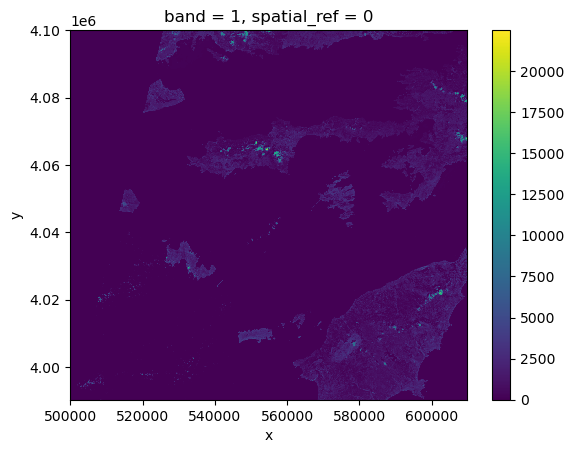

In [33]:
red_lowres.plot()

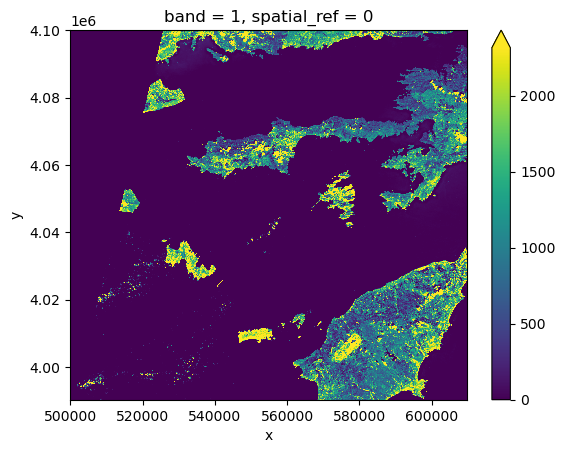

In [34]:
red_lowres.plot(robust=True)

## View Raster Coordinate Reference System (CRS) in Python

In [35]:
red.rio.crs

CRS.from_epsg(32635)

In [49]:
epsg = red.rio.crs.to_epsg()
epsg 

32635

In [50]:
from pyproj import CRS
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Dealing with Missing Data

In [43]:
red_nodata = rioxarray.open_rasterio('red.tif', masked=True, overview_level=2)

In [44]:
red_nodata

<xarray.DataArray (band: 1, y: 1372, x: 1372)>
[1882384 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [46]:
red_lowres.where(red_lowres != red_lowres.rio.nodata)

<xarray.DataArray (band: 1, y: 1372, x: 1372)>
array([[[nan, nan, nan, ..., 28., 29., 38.],
        [nan, nan, nan, ..., 20., 35., 45.],
        [nan, nan, nan, ...,  4., 15., 32.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

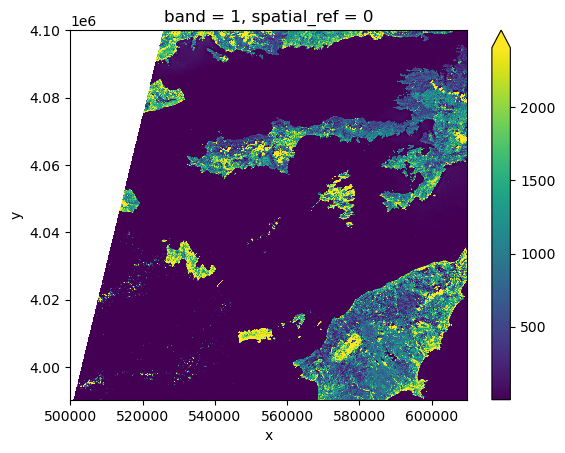

In [48]:
red_nodata.plot(robust=True)

## Raster Bands

In [51]:
import pystac
items = pystac.ItemCollection.from_file('rhodes_sentinel-2.json')

In [52]:
visual_lowres = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=2)
visual_lowres

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
[5655387 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [54]:
visual_lowres.shape

(3, 1373, 1373)

(array([4443900.,  259991.,  269981.,  204256.,  154983.,  108035.,
          77961.,   51288.,   36562.,   48430.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

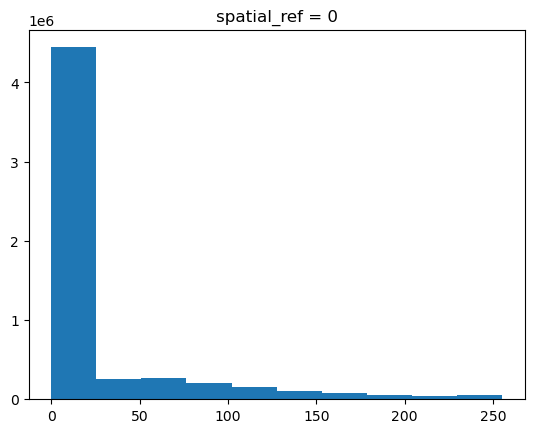

In [56]:
visual_lowres.plot()

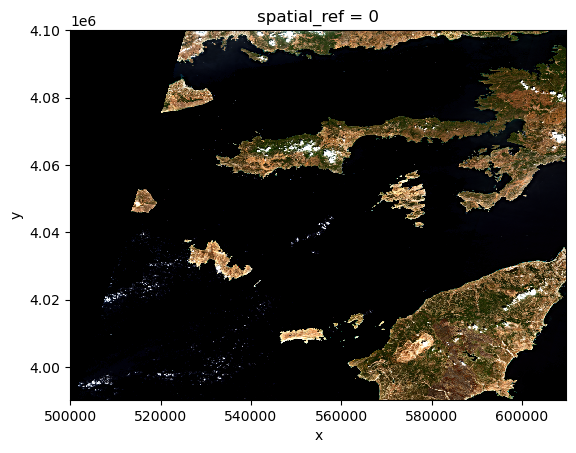

In [57]:
visual_lowres.plot.imshow()